In [33]:
from Chapter2.CreateDataset import CreateDataset
import pandas as pd
import matplotlib.pyplot as plt
import os
from util.VisualizeDataset import VisualizeDataset
from util import util

In [34]:
rawdatapath = "data/raw/"
outputpath = "data/intermediate/"

if not os.path.exists(outputpath):
    print("Empty path, so creating..." + outputpath + "...done!")
    os.makedirs(outputpath)

In [35]:
timecol = "Time (s)"
featurecols = ["Gyroscope x (rad/s)", "Gyroscope y (rad/s)", "Gyroscope z (rad/s)"]
granularities = [60000, 250]

In [36]:
for g in granularities:
    dataset = CreateDataset(rawdatapath, g)
    dataset.add_numerical_dataset("Gyroscope_raw.csv", timecol, featurecols, "avg")
    dataset = dataset.data_table

Reading data from Gyroscope_raw.csv
Reading data from Gyroscope_raw.csv


Figure saved to figures\figure_1.png


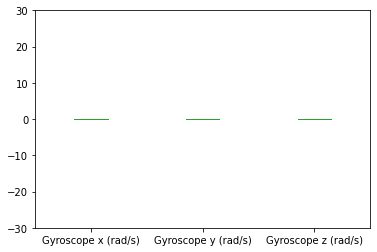

In [37]:
datavis = VisualizeDataset()
datavis.plot_dataset_boxplot(dataset, featurecols)

In [38]:
util.print_statistics(dataset)

        Gyroscope x (rad/s)  Gyroscope y (rad/s)  Gyroscope z (rad/s)
count                 1.000                1.000                1.000
unique                1.000                1.000                1.000
top                  -0.005               -0.006               -0.077
freq                  1.000                1.000                1.000


In [39]:
dataset

,Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s)
1970-01-01,-0.005004,-0.006345,-0.076555
